# Maryland Water Quality Data - Exploratory Data Analysis

#### Project Description

This project explores water quality data collected from various monitoring stations across Maryland, sourced from the National Water Quality Monitoring Council. The dataset includes multiple water quality metrics such as temperature, pH levels, dissolved oxygen, and various chemical concentrations over time. The analysis focuses on understanding the patterns, trends, and anomalies within the data, aiming to provide insights into the state of Maryland's water bodies.

The notebook begins with a thorough data cleaning process, handling missing values, formatting issues, and ensuring that the dataset is ready for analysis. Using Exploratory Data Analysis (EDA) techniques, I identify key trends, visualize data distributions, and investigate correlations between water quality parameters. This analysis helps highlight seasonal variations, potential outliers, and any other factors that could affect water quality over time.

In addition to the data exploration, the EDA section outlines data quality requirements for the next steps, specifically focusing on the data quality checks that will be implemented to ensure the data's accuracy, consistency, and integrity in subsequent stages of the project.

Note: Explanations for each script are included in Step 1 of the notebook. These explanations are not reiterated in Steps 2 through 4 to avoid redundancy.

#### Purpose

The primary purpose of this project is to demonstrate data analysis and data quality techniques in a real-world context, using environmental data. By applying EDA methods to water quality data, the project showcases:

- Data Cleaning and Preparation: Ensuring data integrity by addressing missing or malformed data.

- Exploratory Data Analysis: Identifying trends, distributions, and correlations that provide meaningful insights into the state of Maryland's water quality.

- Visualization: Using visual tools to represent complex data patterns, making it easier to understand key findings.

- Data Quality Requirements: Outlining the necessary data quality checks for future stages of the project, ensuring that any issues found during analysis are addressed.

The project serves as a portfolio piece that demonstrates my ability to work with environmental datasets, perform insightful data analysis, and outline essential data quality processes. It highlights my coding skills, data manipulation, data visualization abilities, and understanding of data quality requirements.

#### Dataset

- organization data
- site data
- project data
- sample results (physical / chemical metadata)

#### Source


National Water Quality Monitoring Council - Water Quality Portal: https://www.waterqualitydata.us

#### Install / update libraries

In [1]:
%pip install pandas
%pip install -U matplotlib
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

#### Specify file location load Organization data

In [ ]:
# File path
orgs_file = 'data/raw/organizations.csv'
projs_file = 'data/raw/projects.csv'
sites_file = 'data/raw/sites.csv'
physchemresults_file = 'data/raw/physchem_results.csv'

# Load data
orgs = pd.read_csv(orgs_file)
projs = pd.read_csv(projs_file)
sites = pd.read_csv(sites_file)
physchemresults = pd.read_csv(physchemresults_file)

/var/folders/ls/mz0w58s926z1f4jr9yc936tc0000gn/T/ipykernel_44181/3011212981.py:11: DtypeWarning: Columns (8,9,10,11,12,13,15,16,17,18,19,20,27,28,29,35,38,44,46,48,49,50,51,54,55,56,57,61,64,65,66,74,77,83,85) have mixed types. Specify dtype option on import or set low_memory=False.
  physchemresults = pd.read_csv(physchemresults_file)


### 1. Exploring and Analyzing: Organizations

#### 1a. Review the First 5 Rows of the Data

In [4]:
# Check the first few rows of each dataset
orgs_head = orgs.head()
print(orgs_head)

   Unnamed: 0 OrganizationIdentifier  \
0           1                USGS-MD   
1           2                USGS-PA   
2           3           11NPSWRD_WQX   
3           4                CBP_WQX   
4           5                   DOEE   

                              OrganizationFormalName  \
0                 USGS Maryland Water Science Center   
1             USGS Pennsylvania Water Science Center   
2     National Park Service Water Resources Division   
3                       Chesapeake Bay Program (CBP)   
4  District Of Columbia Department Of Energy And ...   

                         OrganizationDescriptionText       OrganizationType  \
0                                                NaN                    NaN   
1                                                NaN                    NaN   
2                                                NaN  Federal/US Government   
3    Chesapeake Bay Program (PRODUCTION Environment)  Federal/US Government   
4  Water Quality Monitoring

To understand the dataset, begin by reviewing the first 5 rows. 

To improve readability and consistency, all column names should be converted to lowercase, with words separated by an underscore (_). 

Contact information (email, phone number, and physical address) is not required for this data analysis project or any future analysis. Therefore, we will remove these columns. 

The following columns will remain: Unnamed: 0, OrganizationIdentifier, OrganizationFormalName, OrganizationDescriptionText, OrganizationType, TribalCode, and ProviderName. The Unnamed: 0 column will be renamed to id.

#### 1b. Determining the Number of Rows and Columns

In [5]:
# Count the number of columns and rows in each dataset
orgs_shape = orgs.shape
print(orgs_shape)

(18, 33)


Determining the number of rows and columns helps set data quality (DQ) testing requirements for the future. Future data extractions should match the current row and column count. If discrepancies arise, further analysis will be required to identify the differences. 

As noted above, contact information is not of interest, so future data extractions are expected to include 33 columns. After transformation, however, the data quality requirements will reduce the column count to 7.

#### 1c. Identifying Duplicated Rows

In [6]:
# Check for duplicate rows
orgs_dupes_rows = orgs.duplicated().sum()
print(orgs_dupes_rows)

0


Identifying duplicated rows allows for the removal of redundancies and prevents errors in future analysis. 

There are no duplicated rows in this dataset.

#### 1d. Non-null Counts and Data Types

In [7]:
# List column names, data types, and non-null counts
orgs_info = orgs.info()
print(orgs_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     18 non-null     int64  
 1   OrganizationIdentifier                         18 non-null     object 
 2   OrganizationFormalName                         18 non-null     object 
 3   OrganizationDescriptionText                    13 non-null     object 
 4   OrganizationType                               16 non-null     object 
 5   TribalCode                                     1 non-null      object 
 6   ElectronicAddress                              7 non-null      object 
 7   Telephonic                                     6 non-null      object 
 8   OrganizationAddress.AddressTypeName_1          7 non-null      object 
 9   OrganizationAddress.AddressText_1              7 non-nul

The non-null count in each column informs the DQ requirements for the expected count of values. Data types should be validated to ensure consistency across the data pipeline. 

The expected data types for certain columns are:
- String: OrganizationIdentifier, OrganizationFormalName,  OrganizationDescriptionText, OrganizationType, TribalCode, ElectronicAddress, Telephonic, OrganizationAddress.AddressTypeName_1, OrganizationAddress.AddressText_1, OrganizationAddress.SupplementalAddressText_1, OrganizationAddress.LocalityName_1, OrganizationAddress.StateCode_1, OrganizationAddress.PostalCode_1, OrganizationAddress.CountryCode_1 

- Float: none

- Integer: Unnamed: 0

- Date: none

- Time: none

- Datetime: none

- Boolean: none

Column positions 15 through 31 should be of type object (string), rather than float64. However, this change is not required due to the decision to drop unnecessary columns.

#### 1e. Determining Duplicate Values in Columns

In [8]:
# Check for duplicate values in columns
col_dup = orgs.nunique() / orgs.notnull().sum()

def check_values(value):
    if value < 1:
        return True
    elif value == 1:
        return False

orgs_unique_vs_nonnull_checked = col_dup.apply(check_values)
print(orgs_unique_vs_nonnull_checked)



Unnamed: 0                                       False
OrganizationIdentifier                           False
OrganizationFormalName                            True
OrganizationDescriptionText                      False
OrganizationType                                  True
TribalCode                                       False
ElectronicAddress                                False
Telephonic                                       False
OrganizationAddress.AddressTypeName_1             True
OrganizationAddress.AddressText_1                False
OrganizationAddress.SupplementalAddressText_1    False
OrganizationAddress.LocalityName_1                True
OrganizationAddress.StateCode_1                   True
OrganizationAddress.PostalCode_1                 False
OrganizationAddress.CountryCode_1                 True
OrganizationAddress.CountyCode_1                 False
OrganizationAddress.AddressTypeName_2             None
OrganizationAddress.AddressText_2                 None
Organizati

Duplicate values in columns may help define the dataset. While this is not inherently problematic, it requires further investigation. 

The columns with duplicate values include OrganizationFormalName, OrganizationType, and ProviderName. These should be reviewed.

The following columns contain duplicate values but will not be further investigated as they are not required for the dataset:
- OrganizationAddress.AddressTypeName_1

- OrganizationAddress.LocalityName_1

- OrganizationAddress.StateCode_1

- OrganizationAddress.CountryCode_1

### 1ei. Investigating Duplicate Values in Columns

In [9]:
# Sort each column to quickly find duplicates within the column
col_dup_true = orgs[['OrganizationIdentifier','OrganizationFormalName', 'OrganizationType', 'ProviderName']]
col_dup_true_sorted = col_dup_true.apply(lambda x: x.sort_values().values)
print(col_dup_true_sorted)

   OrganizationIdentifier                             OrganizationFormalName  \
0            11NPSWRD_WQX                       Chesapeake Bay Program (CBP)   
1                 CBP_WQX  District Of Columbia Department Of Energy And ...   
2                    DOEE       EPA National Aquatic Resources Survey (NARS)   
3                   GLEON      Environmental Assessment and Standard Program   
4                    IWLA                    GLEON Lake Observer (Volunteer)   
5                   MDDNR                     Izaak Walton League of America   
6            MDEDAT05_WQX           Maryland Department of Natural Resources   
7            MDEDAT07_WQX           Maryland Department of Natural Resources   
8            MDEDAT08_WQX  Maryland Department of the Environment Beaches...   
9                MDE_EASP  Maryland Dept. of the  Environment Shellfish Data   
10  MDE_FIELDSERVICES_WQX  Maryland Dept. of the Environment In House Wat...   
11               MDE_TMDL     National P

In the OrganizationFormalName column, the string “Maryland Department of Natural Resources” appears twice. These rows should be reviewed to clarify the duplication.

In the OrganizationType column, several values appear to be prepopulated during data entry. These duplicated values are expected and do not need further investigation.

The ProviderName column includes two consistent options aligned with the National Water Quality Monitoring Council website.

In [10]:
# Display rows where 'OrganizationFormalName' is equal to 'Maryland Department of Natural Resources'. 
org_dup_1 = orgs[orgs['OrganizationFormalName'] == 'Maryland Department of Natural Resources']
print(org_dup_1)

   Unnamed: 0 OrganizationIdentifier  \
7           8                  MDDNR   
8           9           MDEDAT05_WQX   

                     OrganizationFormalName  \
7  Maryland Department of Natural Resources   
8  Maryland Department of Natural Resources   

                         OrganizationDescriptionText      OrganizationType  \
7  The Department of Natural Resources leads Mary...  *State Government US   
8  contains  MBSS Data etc., Core Trend Benthic i...   State/US Government   

  TribalCode                                  ElectronicAddress  \
7        NaN  http://mddnr.chesapeakebay.net/eyesonthebay/in...   
8        NaN  alexander.yeboah@maryland.gov (Email);vimala.j...   

                                 Telephonic  \
7  410-260-8630 (Office);410-260-8640 (Fax)   
8                                       NaN   

  OrganizationAddress.AddressTypeName_1 OrganizationAddress.AddressText_1  \
7                               Mailing                 580 Taylor Avenue   
8   

These records are unique due to different OrganizationIdentifier and contact information, and should remain unchanged.

#### 1f. Identifying Common Columns Between Tables

In [11]:
# Determine common columns between orgs and projs
common_columns_orgs_projs = set(orgs.columns).intersection(set(projs.columns))
print('Columns found in both organizations and projects:', common_columns_orgs_projs)

# Determine common columns between orgs and sites
common_columns_orgs_sites = set(orgs.columns).intersection(set(sites.columns))
print('Columns found in both organizations and sites:', common_columns_orgs_sites)

# Determine common columns between orgs and physical chemistry results
common_columns_orgs_physchemresults = set(orgs.columns).intersection(set(physchemresults.columns))
print('Columns found in both organizations and physchemresults:', common_columns_orgs_physchemresults)

Columns found in both organizations and projects: {'OrganizationIdentifier', 'OrganizationFormalName', 'Unnamed: 0'}
Columns found in both organizations and sites: {'OrganizationIdentifier', 'OrganizationFormalName', 'Unnamed: 0', 'ProviderName'}
Columns found in both organizations and physchemresults: {'OrganizationIdentifier', 'OrganizationFormalName', 'Unnamed: 0', 'ProviderName'}


Next, run the same tests on the other tables in the dataset and continue exploring as necessary.

### 2. Exploring and Analyzing: Projects

#### 2a. Review the First 5 Rows of the Data

In [12]:
# Check the first few rows of each dataset
projs_head = projs.head()
print(projs_head)

   Unnamed: 0 OrganizationIdentifier  \
0           1                CBP_WQX   
1           2           MDEDAT08_WQX   
2           3           MDEDAT08_WQX   
3           4           MDEDAT08_WQX   
4           5           MDEDAT08_WQX   

                              OrganizationFormalName ProjectIdentifier  \
0                       Chesapeake Bay Program (CBP)            BAY713   
1  Maryland Department of the Environment Beaches...          MD947508   
2  Maryland Department of the Environment Beaches...          MD954026   
3  Maryland Department of the Environment Beaches...          MD329092   
4  Maryland Department of the Environment Beaches...          MD468013   

               ProjectName                             ProjectDescriptionText  \
0  Project Cruise - BAY713  CBP: Cruise under which the monitoring was con...   
1               Colchester           Beach Monitoring and Public Notification   
2           Franklin Manor           Beach Monitoring and Public Notifi

To improve readability and consistency, all column names should be converted to lowercase, with words separated by an underscore (_). The Unnamed: 0 column will be renamed to id.

#### 2b. Determining the Number of Rows and Columns

In [13]:
# Count the number of columns and rows in each dataset
projs_shape = projs.shape
print(projs_shape)

(326, 11)


#### 2c. Identifying Duplicated Rows

In [14]:
# Check for duplicate rows
projs_dupes_rows = projs.duplicated().sum()
print(projs_dupes_rows)

0


#### 2d. Non-null Counts and Data Types

In [15]:
# List column names, data types, and non-null counts
projs_info = projs.info()
print(projs_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             326 non-null    int64  
 1   OrganizationIdentifier                 326 non-null    object 
 2   OrganizationFormalName                 326 non-null    object 
 3   ProjectIdentifier                      326 non-null    object 
 4   ProjectName                            326 non-null    object 
 5   ProjectDescriptionText                 326 non-null    object 
 6   SamplingDesignTypeCode                 1 non-null      object 
 7   QAPPApprovedIndicator                  61 non-null     object 
 8   QAPPApprovalAgencyName                 4 non-null      object 
 9   ProjectFileUrl                         1 non-null      object 
 10  ProjectMonitoringLocationWeightingUrl  0 non-null      float64
dtypes: flo

The expected data types for certain columns are:
- String: OrganizationIdentifier, OrganizationFormalName, ProjectIdentifier, ProjectName, ProjectDescriptionText, SamplingDesignTypeCode, QAPPApprovedIndicator, QAPPApprovalAgencyName, ProjectFileUrl, ProjectMonitoringLocationWeightingUrl

- Float: none

- Integer: Unnamed: 0

- Date: none

- Time: none

- Datetime: none

- Boolean: none


#### 2e. Determining Duplicate Values in Columns

In [16]:
# Check for duplicate values in columns
col_dup = projs.nunique() / projs.notnull().sum()

def check_values(value):
    if value < 1:
        return True
    elif value == 1:
        return False

projs_unique_vs_nonnull_checked = col_dup.apply(check_values)
print(projs_unique_vs_nonnull_checked)



Unnamed: 0                               False
OrganizationIdentifier                    True
OrganizationFormalName                    True
ProjectIdentifier                         True
ProjectName                               True
ProjectDescriptionText                    True
SamplingDesignTypeCode                   False
QAPPApprovedIndicator                     True
QAPPApprovalAgencyName                    True
ProjectFileUrl                           False
ProjectMonitoringLocationWeightingUrl     None
dtype: object


It is expected that organizations have multiple projects, which will cause duplicate values in OrganizationIdentifier and OrganizationFormalName.

Similarly, projects may include multiple organizations, leading to duplicate values in ProjectIdentifier, ProjectName, and ProjectDescriptionText.

The following columns require further investigation:
- QAPPApprovedIndicator

- QAPPApprovalAgencyName

The organization table highlights the connection between OrganizationIdentifier and OrganizationFormalName. One of these can be used to confirm that an organization can be associated with multiple projects. 

In [17]:
# Confirm OrganizationIdentifier is associated with multiple projects
unique_projects = projs[['OrganizationIdentifier', 'ProjectIdentifier', 'ProjectName']].sort_values(by='OrganizationIdentifier')
print(unique_projects)

    OrganizationIdentifier ProjectIdentifier  \
47            11NPSWRD_WQX          NCRNWQ01   
0                  CBP_WQX            BAY713   
224                CBP_WQX            BAY783   
225                CBP_WQX            BAY782   
226                CBP_WQX            BAY780   
..                     ...               ...   
72                NARS_WQX     NARS_NRSA1819   
61                NARS_WQX         NWCA 2021   
297            NWRSFWS_WQX         R5NWRS_WQ   
318                WWMD_VA          ArctiCAP   
66                 WWMD_VA          Campaign   

                                           ProjectName  
47   NCRN Perennial Nontidal Stream Chemistry Monit...  
0                              Project Cruise - BAY713  
224                            Project Cruise - BAY783  
225                            Project Cruise - BAY782  
226                            Project Cruise - BAY780  
..                                                 ...  
72    National Rivers an

For example, where OrganizationIdentifier is CBP_WQX, there are several ProjectIdentifier values: BAY713, BAY783, BAY782, and BAY780.

There is a clear relationship between ProjectIdentifier, ProjectName, and ProjectDescriptionText. One of these columns can be used to confirm that a project can involve multiple organizations

In [18]:
# Confirm OrganizationIdentifier is associated with multiple projects
unique_projects = projs[['ProjectIdentifier', 'OrganizationIdentifier', 'OrganizationFormalName']].sort_values(by='ProjectIdentifier')
print(unique_projects)

    ProjectIdentifier OrganizationIdentifier  \
57           2014DATA           MDEDAT07_WQX   
58           2015DATA           MDEDAT07_WQX   
222          2017DATA           MDEDAT07_WQX   
126          2018DATA           MDEDAT07_WQX   
64           2019DATA           MDEDAT07_WQX   
..                ...                    ...   
45               TRIB                  MDDNR   
41               TRIB                CBP_WQX   
213             TWQMP                CBP_WQX   
117      WATERQUALITY                CBP_WQX   
175            WW2016  MDE_FIELDSERVICES_WQX   

                                OrganizationFormalName  
57   Maryland Dept. of the  Environment Shellfish Data  
58   Maryland Dept. of the  Environment Shellfish Data  
222  Maryland Dept. of the  Environment Shellfish Data  
126  Maryland Dept. of the  Environment Shellfish Data  
64   Maryland Dept. of the  Environment Shellfish Data  
..                                                 ...  
45            Maryland D

For instance, where ProjectIdentifier is TRIB, there are two OrganizationIdentifier values: MDDNR and CBP_WQX.

##### 2ei. Investigating Duplicate Values in Columns

In [19]:
# Show unique values for QAPPApprovedIndicator
unique_qapp_approved_indicator = projs['QAPPApprovedIndicator'].unique()
print('Unique values for QAPPApprovedIndicator:', unique_qapp_approved_indicator)

# Show unique values for QAPPApprovalAgencyName
unique_qapp_approval_agency_name = projs['QAPPApprovalAgencyName'].unique()
print('Unique values for QAPPApprovalAgencyName:', unique_qapp_approval_agency_name)

Unique values for QAPPApprovedIndicator: [nan 'N' 'Y']
Unique values for QAPPApprovalAgencyName: [nan 'USEPA Chesapeake Bay Program Office']


Regarding columns QAPPApprovedIndicator and QAPPApprovalAgencyName:
- QAPPApprovedIndicator: Duplicate values within a column are expected for a boolean field.

- QAPPApprovalAgencyName: It is expected that the same agency would be approving these projects.

In [20]:
unique_qapp_approval_agency_name_counts = projs['QAPPApprovalAgencyName'].value_counts()
print(unique_qapp_approval_agency_name_counts)

QAPPApprovalAgencyName
USEPA Chesapeake Bay Program Office    4
Name: count, dtype: int64


#### 2f. Identifying Common Columns Between Tables

In [21]:
# Determine common columns between projs and orgs
common_columns_projs_orgs = set(projs.columns).intersection(set(orgs.columns))
print('Columns found in both projects and organizations:', common_columns_projs_orgs)

# Determine common columns between projs and sites
common_columns_projs_sites = set(projs.columns).intersection(set(sites.columns))
print('Columns found in both projects and sites:', common_columns_projs_sites)

# Determine common columns between projs and physical chemistry results
common_columns_projs_physchemresults = set(projs.columns).intersection(set(physchemresults.columns))
print('Columns found in both projects and physchemresults:', common_columns_projs_physchemresults)

Columns found in both projects and organizations: {'OrganizationIdentifier', 'OrganizationFormalName', 'Unnamed: 0'}
Columns found in both projects and sites: {'OrganizationIdentifier', 'OrganizationFormalName', 'Unnamed: 0'}
Columns found in both projects and physchemresults: {'Unnamed: 0', 'ProjectIdentifier', 'OrganizationIdentifier', 'OrganizationFormalName', 'ProjectName'}


### 3. Exploring and Analyzing: Sites

#### 3a. Review the First 5 Rows of the Data 

In [22]:
# Check the first few rows of each dataset
sites_head = sites.head()
print(sites_head)

   Unnamed: 0 OrganizationIdentifier              OrganizationFormalName  \
0           1                USGS-MD  USGS Maryland Water Science Center   
1           2                USGS-MD  USGS Maryland Water Science Center   
2           3                USGS-MD  USGS Maryland Water Science Center   
3           4                USGS-MD  USGS Maryland Water Science Center   
4           5                USGS-MD  USGS Maryland Water Science Center   

  MonitoringLocationIdentifier MonitoringLocationName  \
0         USGS-392842076342501              BA De 655   
1         USGS-385130076465501              PG De  21   
2         USGS-385952077050801              MO Ff  19   
3         USGS-391057077243501              MO Cc  31   
4         USGS-391111076585101              HO Cd 206   

  MonitoringLocationTypeName MonitoringLocationDescriptionText  \
0                       Well                               NaN   
1                       Well                               NaN   
2 

To improve readability and consistency, all column names should be converted to lowercase, with words separated by an underscore (_). The Unnamed: 0 column will be renamed to id.

#### 3b. Determining the Number of Rows and Columns

In [23]:
# Count the number of columns and rows in each dataset
sites_shape = sites.shape
print(sites_shape)

(761, 38)


#### 3c. Identifying Duplicated Rows

In [24]:
# Check for duplicate rows
sites_dupes_rows = sites.duplicated().sum()
print(sites_dupes_rows)

0


#### 3d. Non-null Counts and Data Types 

In [25]:
# List column names, data types, and non-null counts
sites_info = sites.info()
print(sites_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       761 non-null    int64  
 1   OrganizationIdentifier                           761 non-null    object 
 2   OrganizationFormalName                           761 non-null    object 
 3   MonitoringLocationIdentifier                     761 non-null    object 
 4   MonitoringLocationName                           761 non-null    object 
 5   MonitoringLocationTypeName                       761 non-null    object 
 6   MonitoringLocationDescriptionText                431 non-null    object 
 7   HUCEightDigitCode                                761 non-null    int64  
 8   DrainageAreaMeasure.MeasureValue                 24 non-null     float64
 9   DrainageAreaMeasure.MeasureUnitC

Columns automatically assigned float64 due to zero non-nill values:
- The column ContributingDrainageAreaMeasure.MeasureUnitCode seems to be more appropriate as object (string), rather than float64. Note that all other '...MeasureUnitCode' columns are of type object.

- The column LocalAqfrName should likely be of type string since it represents a 'name'.

The expected data types for certain columns are:
- String: OrganizationIdentifier, OrganizationFormalName, MonitoringLocationIdentifier, MonitoringLocationName, MonitoringLocationTypeName, MonitoringLocationDescriptionText, DrainageAreaMeasure.MeasureUnitCode, ContributingDrainageAreaMeasure.MeasureUnitCode, HorizontalAccuracyMeasure.MeasureUnitCode, HorizontalCollectionMethodName, HorizontalCoordinateReferenceSystemDatumName, VerticalMeasure.MeasureUnitCode, VerticalAccuracyMeasure.MeasureUnitCode, VerticalCollectionMethodName, VerticalCoordinateReferenceSystemDatumName, CountryCode, AquiferName, LocalAqfrName, FormationTypeText, AquiferTypeName, ConstructionDateText, WellDepthMeasure.MeasureUnitCode, WellHoleDepthMeasure.MeasureUnitCode, ProviderName

- Float: DrainageAreaMeasure.MeasureValue, ContributingDrainageAreaMeasure.MeasureValue, LatitudeMeasure, LongitudeMeasure, SourceMapScaleNumeric, HorizontalAccuracyMeasure.MeasureValue, VerticalMeasure.MeasureValue, VerticalAccuracyMeasure.MeasureValue, WellDepthMeasure.MeasureValue, WellHoleDepthMeasure.MeasureValue  

- Integer: Unnamed: 0, HUCEightDigitCode, StateCode, CountyCode 

- Date: none

- Time: none

- Datetime: none

- Boolean: none

#### 3e. Determining Duplicate Values in Columns

In [26]:
# Check for duplicate values in columns
col_dup = sites.nunique() / sites.notnull().sum()

def check_values(value):
    if value < 1:
        return True
    elif value == 1:
        return False

sites_unique_vs_nonnull_checked = col_dup.apply(check_values)
print(sites_unique_vs_nonnull_checked)



Unnamed: 0                                         False
OrganizationIdentifier                              True
OrganizationFormalName                              True
MonitoringLocationIdentifier                       False
MonitoringLocationName                              True
MonitoringLocationTypeName                          True
MonitoringLocationDescriptionText                   True
HUCEightDigitCode                                   True
DrainageAreaMeasure.MeasureValue                   False
DrainageAreaMeasure.MeasureUnitCode                 True
ContributingDrainageAreaMeasure.MeasureValue        None
ContributingDrainageAreaMeasure.MeasureUnitCode     None
LatitudeMeasure                                     True
LongitudeMeasure                                    True
SourceMapScaleNumeric                               True
HorizontalAccuracyMeasure.MeasureValue              True
HorizontalAccuracyMeasure.MeasureUnitCode           True
HorizontalCollectionMethodName 

Projects and Organizations: Multiple projects can be associated with a single organization, leading to duplicate values in OrganizationIdentifier and OrganizationFormalName.

Columns related to location are expected to have duplicates due to overlapping testing locations. The relevant columns are:
MonitoringLocationIdentifier, MonitoringLocationName, MonitoringLocationTypeName, MonitoringLocationDescriptionText, HUCEightDigitCode.

Measurements and Units: Expected duplicate values in DrainageAreaMeasure.MeasureUnitCode, ContributingDrainageAreaMeasure.MeasureUnitCode, LatitudeMeasure, LongitudeMeasure, SourceMapScaleNumeric, HorizontalAccuracyMeasure.MeasureValue, HorizontalAccuracyMeasure.MeasureUnitCode, HorizontalCollectionMethodName, HorizontalCoordinateReferenceSystemDatumName, VerticalMeasure.MeasureValue, VerticalMeasure.MeasureUnitCode, VerticalAccuracyMeasure.MeasureValue, VerticalAccuracyMeasure.MeasureUnitCode, VerticalCollectionMethodName, VerticalCoordinateReferenceSystemDatumName, CountryCode, StateCode, CountyCode, WellDepthMeasure.MeasureValue, WellDepthMeasure.MeasureUnitCode, WellHoleDepthMeasure.MeasureValue, WellHoleDepthMeasure.MeasureUnitCode.

Other Expected Duplicates: ProviderName.

Further investigation is required for the following columns: AquiferName, FormationTypeText, and AquiferTypeName.



##### 3ei. Investigating Duplicate Values in Columns

In [27]:
# Confirm AquiferName, FormationTypeText, and AquiferTypeName 
unique_sites = sites[['OrganizationIdentifier', 'AquiferName', 'FormationTypeText', 'AquiferTypeName']].dropna(subset=['AquiferName']).sort_values(by='OrganizationIdentifier')
print(unique_sites)

   OrganizationIdentifier                                        AquiferName  \
0                 USGS-MD  Piedmont and Blue Ridge crystalline-rock aquifers   
27                USGS-MD     Northern Atlantic Coastal Plain aquifer system   
28                USGS-MD     Northern Atlantic Coastal Plain aquifer system   
29                USGS-MD     Northern Atlantic Coastal Plain aquifer system   
30                USGS-MD     Northern Atlantic Coastal Plain aquifer system   
31                USGS-MD  Piedmont and Blue Ridge crystalline-rock aquifers   
32                USGS-MD  Piedmont and Blue Ridge crystalline-rock aquifers   
33                USGS-MD  Piedmont and Blue Ridge crystalline-rock aquifers   
34                USGS-MD  Piedmont and Blue Ridge crystalline-rock aquifers   
35                USGS-MD  Piedmont and Blue Ridge crystalline-rock aquifers   
26                USGS-MD     Northern Atlantic Coastal Plain aquifer system   
36                USGS-MD  Piedmont and 

AquiferName, FormationTypeText, and AquiferTypeName represent names, formation types, and aquifer types, respectively. Based on information from the National Water Quality Monitoring Council's website, it is expected that an organization may have more than one aquifer, so duplication in these columns is acceptable.

#### 3f. Identifying Common Columns Between Tables

In [28]:
# Determine common columns between sites and organizations
common_columns_sites_orgs = set(sites.columns).intersection(set(orgs.columns))
print('Columns found in both sites and organizations:', common_columns_sites_orgs)

# Determine common columns between sites and projects
common_columns_sites_projs = set(sites.columns).intersection(set(projs.columns))
print('Columns found in both sites and projects:', common_columns_sites_projs)

# Determine common columns between sites and physical chemistry results
common_columns_sites_physchemresults = set(sites.columns).intersection(set(physchemresults.columns))
print('Columns found in both sites and physchemresults:', common_columns_sites_physchemresults)

Columns found in both sites and organizations: {'OrganizationIdentifier', 'OrganizationFormalName', 'Unnamed: 0', 'ProviderName'}
Columns found in both sites and projects: {'OrganizationIdentifier', 'OrganizationFormalName', 'Unnamed: 0'}
Columns found in both sites and physchemresults: {'MonitoringLocationIdentifier', 'Unnamed: 0', 'MonitoringLocationName', 'OrganizationIdentifier', 'OrganizationFormalName', 'ProviderName'}


### 4. Exploring and Analyzing: Physical Chemistry Results

#### 4a. Review the First 5 Rows of the Data

In [29]:
# Check the first few rows of each dataset
physchemresults_head = physchemresults.head()
print(physchemresults_head)

   Unnamed: 0 OrganizationIdentifier  \
0        3131               MDE_EASP   
1        7485               MDE_EASP   
2       29781               MDE_EASP   
3       51553               MDE_EASP   
4       52989               MDE_EASP   

                          OrganizationFormalName  \
0  Environmental Assessment and Standard Program   
1  Environmental Assessment and Standard Program   
2  Environmental Assessment and Standard Program   
3  Environmental Assessment and Standard Program   
4  Environmental Assessment and Standard Program   

                    ActivityIdentifier ActivityTypeCode ActivityMediaName  \
0  MDE_EASP-JON00682014-01-0512::01603    Field Msr/Obs             Water   
1  MDE_EASP-JON00682014-01-0512::01344    Field Msr/Obs             Water   
2  MDE_EASP-JON00682014-01-0513::01345    Field Msr/Obs             Water   
3  MDE_EASP-JON00682014-01-0513::01604    Field Msr/Obs             Water   
4  MDE_EASP-JON00682014-01-0514::01346    Field Msr/Obs      

To improve readability and consistency, all column names should be converted to lowercase, with words separated by an underscore (_). The Unnamed: 0 column will be renamed to id.

#### 4b. Determining the Number of Rows and Columns

In [30]:
# Count the number of columns and rows in each dataset
physchemresults_shape = physchemresults.shape
print(physchemresults_shape)

(404717, 86)


#### 4c. Identifying Duplicated Rows

In [31]:
# Check for duplicate rows
physchemresults_dupes_rows = physchemresults.duplicated().sum()
print(physchemresults_dupes_rows)

0


#### 4d. Non-null Counts and Data Types

In [32]:
# List column names, data types, and non-null counts
physchemresults_info = physchemresults.info()
print(physchemresults_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404717 entries, 0 to 404716
Data columns (total 86 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         404717 non-null  int64  
 1   OrganizationIdentifier                             404717 non-null  object 
 2   OrganizationFormalName                             404717 non-null  object 
 3   ActivityIdentifier                                 404717 non-null  object 
 4   ActivityTypeCode                                   404717 non-null  object 
 5   ActivityMediaName                                  404717 non-null  object 
 6   ActivityMediaSubdivisionName                       23673 non-null   object 
 7   ActivityStartDate                                  404717 non-null  object 
 8   ActivityStartTime.Time                             363314 non-null  object

The expected data types for certain columns are:
- String: OrganizationIdentifier, OrganizationFormalName, ActivityIdentifier, ActivityTypeCode, ActivityMediaName, ActivityMediaSubdivisionName, ActivityStartTime.TimeZoneCode, ActivityEndTime.TimeZoneCode, ActivityRelativeDepthName, ActivityDepthHeightMeasure.MeasureUnitCode, ActivityDepthAltitudeReferencePointText, ActivityTopDepthHeightMeasure.MeasureValue, ActivityTopDepthHeightMeasure.MeasureUnitCode, ActivityBottomDepthHeightMeasure.MeasureValue, ActivityBottomDepthHeightMeasure.MeasureUnitCode, ProjectIdentifier, ProjectName, ActivityConductingOrganizationText, MonitoringLocationIdentifier, MonitoringLocationName, ActivityCommentText, SampleAquifer, HydrologicCondition, HydrologicEvent, SampleCollectionMethod.MethodIdentifier SampleCollectionMethod.MethodIdentifierContext, SampleCollectionMethod.MethodName, SampleCollectionMethod.MethodDescriptionText, SampleCollectionEquipmentName, ResultIdentifier, ResultDetectionConditionText, MethodSpeciationName, CharacteristicName, ResultSampleFractionText, ResultMeasureValue, ResultMeasure.MeasureUnitCode, MeasureQualifierCode, ResultStatusIdentifier, StatisticalBaseCode, ResultValueTypeName, ResultWeightBasisText, ResultTimeBasisText, ResultTemperatureBasisText, ResultParticleSizeBasisText, DataQuality.ConfidenceIntervalValue, DataQuality.UpperConfidenceLimitValue, DataQuality.LowerConfidenceLimitValue, ResultCommentText, ResultDepthHeightMeasure.MeasureUnitCode, ResultDepthAltitudeReferencePointText, BinaryObjectFileName, BinaryObjectFileTypeCode, ResultFileUrl, ResultAnalyticalMethod.MethodIdentifier, ResultAnalyticalMethod.MethodIdentifierContext, ResultAnalyticalMethod.MethodName, ResultAnalyticalMethod.MethodDescriptionText, LaboratoryName, ResultLaboratoryCommentText, ResultDetectionQuantitationLimitUrl, DetectionQuantitationLimitTypeName, DetectionQuantitationLimitMeasure.MeasureValue, DetectionQuantitationLimitMeasure.MeasureUnitCode, ProviderName   

- Float: ActivityDepthHeightMeasure.MeasureValue, ActivityTopDepthHeightMeasure.MeasureValue, ActivityBottomDepthHeightMeasure.MeasureValue, ResultMeasureValue, DetectionQuantitationLimitMeasure.MeasureValue, ActivityLocation.LatitudeMeasure, ActivityLocation.LongitudeMeasure, ResultDepthHeightMeasure.MeasureValue

- Integer: id, USGSPCode, ActivityStartTime.TimeZoneCode_offset, ActivityEndTime.TimeZoneCode_offset 

- Date: ActivityStartDate, ActivityEndDate, AnalysisStartDate 

- Time: ActivityStartTime.Time, ActivityEndTime.Time 

- Datetime: LastUpdated, ActivityStartDateTime, ActivityEndDateTime  

- Boolean: none

The following columns currently contain only null values and should be reviewed once data becomes available: SubjectTaxonomicName, SampleTissueAnatomyName, ResultAnalyticalMethod.MethodUrl, LabSamplePreparationUrl, DataQuality.PrecisionValue, DataQuality.BiasValue


#### 4e. Determining Duplicate Values in Columns

In [33]:
# Check for duplicate values in columns
col_dup = physchemresults.nunique() / physchemresults.notnull().sum()

def check_values(value):
    if value < 1:
        return True
    elif value == 1:
        return False

physchemresults_unique_vs_nonnull_checked = col_dup.apply(check_values)
first_half = physchemresults_unique_vs_nonnull_checked.iloc[:43]
second_half = physchemresults_unique_vs_nonnull_checked.iloc[43:]
print(first_half)
print(second_half)

Unnamed: 0                                          False
OrganizationIdentifier                               True
OrganizationFormalName                               True
ActivityIdentifier                                   True
ActivityTypeCode                                     True
ActivityMediaName                                    True
ActivityMediaSubdivisionName                         True
ActivityStartDate                                    True
ActivityStartTime.Time                               True
ActivityStartTime.TimeZoneCode                       True
ActivityEndDate                                      True
ActivityEndTime.Time                                 True
ActivityEndTime.TimeZoneCode                         True
ActivityRelativeDepthName                            True
ActivityDepthHeightMeasure.MeasureValue              True
ActivityDepthHeightMeasure.MeasureUnitCode           True
ActivityDepthAltitudeReferencePointText              True
ActivityTopDep

Projects and Organizations: Multiple projects can be associated with a single organization, leading to duplicate values in OrganizationIdentifier, and OrganizationFormalName. 

Sampling Activities: Since sampling is routine, the following columns are expected to have duplicate values: ActivityIdentifier, ActivityTypeCode, ActivityMediaName, ActivityMediaSubdivisionName , ActivityStartDate, ActivityStartTime.Time, ActivityStartTime.TimeZoneCode, ActivityEndDate, ActivityEndTime.Time, ActivityEndTime.TimeZoneCode, ActivityRelativeDepthName, ActivityDepthHeightMeasure.MeasureValue, ActivityDepthHeightMeasure.MeasureUnitCode, ActivityDepthAltitudeReferencePointText, ActivityTopDepthHeightMeasure.MeasureValue, ActivityTopDepthHeightMeasure.MeasureUnitCode , ActivityBottomDepthHeightMeasure.MeasureValue, ActivityBottomDepthHeightMeasure.MeasureUnitCode, ActivityConductingOrganizationText, ActivityCommentText, HydrologicCondition, HydrologicEvent, SampleCollectionMethod.MethodIdentifier, SampleCollectionMethod.MethodIdentifierContext, SampleCollectionMethod.MethodName, SampleCollectionMethod.MethodDescriptionText, SampleCollectionEquipmentName, ResultDetectionConditionText, MethodSpeciationName, CharacteristicName, ResultSampleFractionText, MeasureQualifierCode, ResultStatusIdentifier, StatisticalBaseCode, ResultValueTypeName, ResultWeightBasisText, ResultTimeBasisText, ResultTemperatureBasisText, ResultParticleSizeBasisText, DataQuality.PrecisionValue, DataQuality.BiasValue, DataQuality.ConfidenceIntervalValue, DataQuality.UpperConfidenceLimitValue, DataQuality.LowerConfidenceLimitValue, ResultCommentText, USGSPCode, ResultDepthAltitudeReferencePointText, ResultAnalyticalMethod.MethodIdentifier, ResultAnalyticalMethod.MethodIdentifierContext, ResultAnalyticalMethod.MethodName, ResultAnalyticalMethod.MethodDescriptionText, LaboratoryName, AnalysisStartDate, ResultLaboratoryCommentText, DetectionQuantitationLimitTypeName, ActivityStartTime.TimeZoneCode_offset, ActivityStartDateTime, ActivityEndTime.TimeZoneCode_offset, ActivityEndDateTime.                                                  

Projects Involving Multiple Organizations: Duplicates in ProjectIdentifier, and ProjectName.   

Location Data: Duplicates in MonitoringLocationIdentifier, MonitoringLocationName,    

Measurement Units: Expected duplicate values in ResultMeasureValue, ResultMeasure.MeasureUnitCode, ResultDepthHeightMeasure.MeasureValue, ResultDepthHeightMeasure.MeasureUnitCode, DetectionQuantitationLimitMeasure.MeasureValue, DetectionQuantitationLimitMeasure.MeasureUnitCode.

Other Expected Duplicates: ProviderName is not required to be unique, and LastUpdated describes the last time a record was modified, so it will also contain duplicate values.

#### 4f. Identifying Common Columns Between Tables

In [34]:
# Determine common columns between physchemresults and orgs
common_columns_physchemresults_orgs = set(physchemresults.columns).intersection(set(orgs.columns))
print('Columns found in both physchemresults and organizations:', common_columns_physchemresults_orgs)

# Determine common columns between physchemresults and projects
common_columns_physchemresults_projs = set(physchemresults.columns).intersection(set(projs.columns))
print('Columns found in both physchemresults and projects:', common_columns_physchemresults_projs)

# Determine common columns between physchemresults and sites
common_columns_physchemresults_sites = set(physchemresults.columns).intersection(set(sites.columns))
print('Columns found in both physchemresult and sites:', common_columns_physchemresults_sites)

Columns found in both physchemresults and organizations: {'OrganizationIdentifier', 'OrganizationFormalName', 'Unnamed: 0', 'ProviderName'}
Columns found in both physchemresults and projects: {'Unnamed: 0', 'ProjectIdentifier', 'OrganizationIdentifier', 'OrganizationFormalName', 'ProjectName'}
Columns found in both physchemresult and sites: {'MonitoringLocationIdentifier', 'Unnamed: 0', 'MonitoringLocationName', 'OrganizationIdentifier', 'OrganizationFormalName', 'ProviderName'}


#### 4g. Identifying Water Quality Indicators and Distribution of Observances

/var/folders/ls/mz0w58s926z1f4jr9yc936tc0000gn/T/ipykernel_44181/3092695924.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physchemresults_null_results_filtered['ResultMeasureValue'] = pd.to_numeric(physchemresults_null_results_filtered['ResultMeasureValue'], errors='coerce')


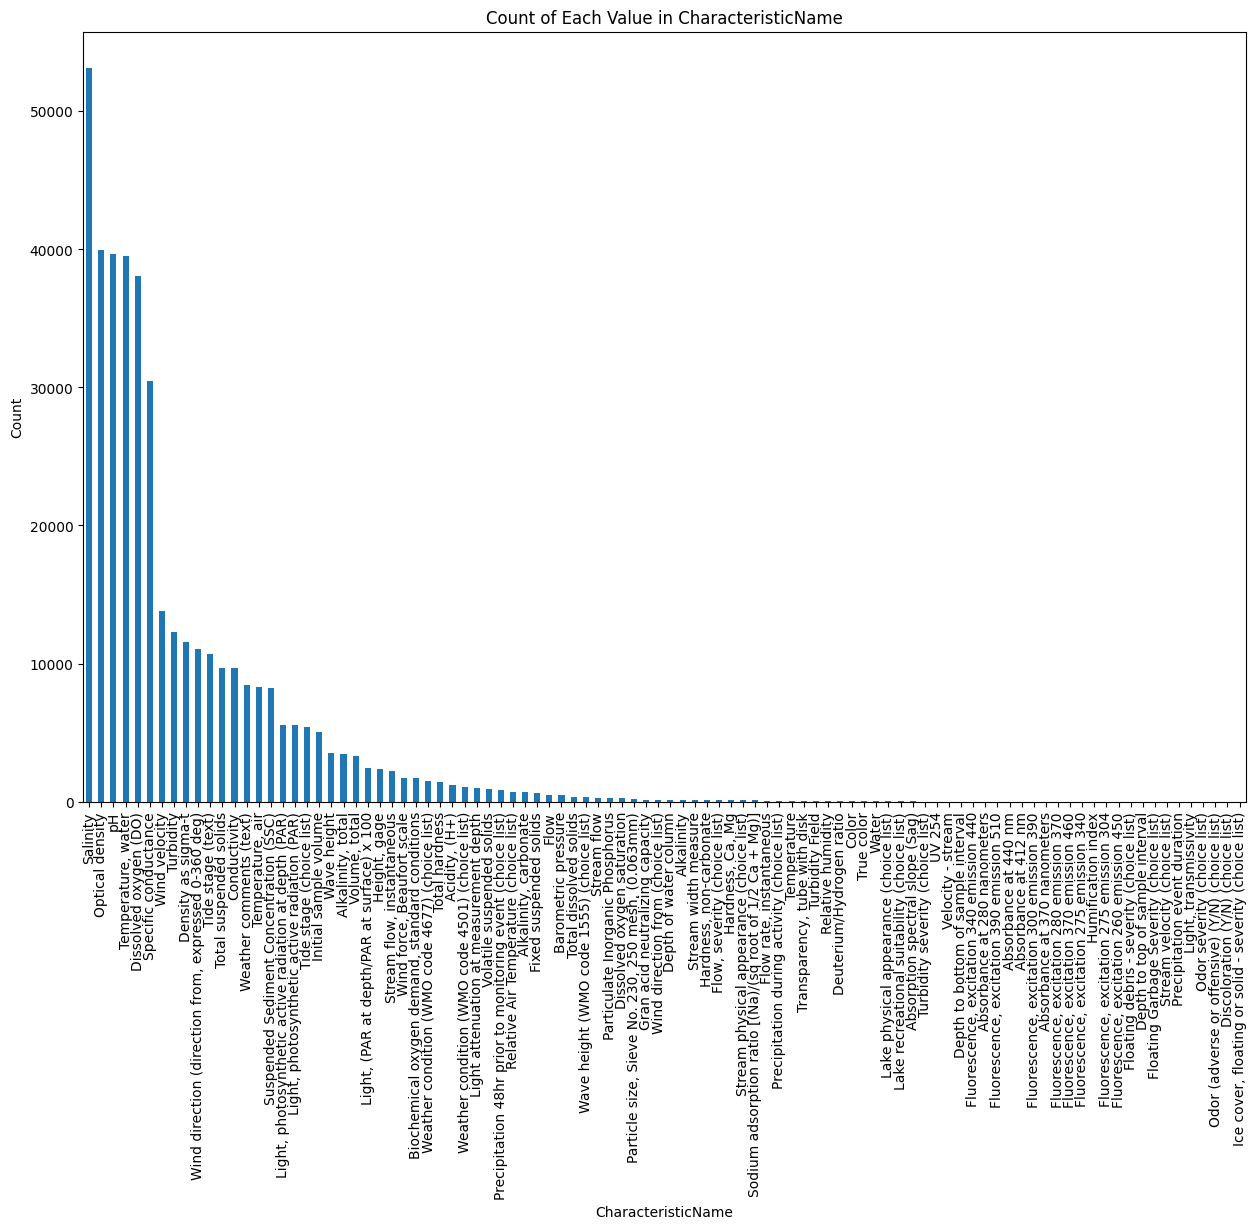

In [35]:
# Filter rows where ResultMeasureValue is null
def filter_null_results(physchemresults):
    return physchemresults.dropna(subset=['ResultMeasureValue'])

# Get rows where ResultMeasureValue is not null
physchemresults_null_results_filtered = filter_null_results(physchemresults)

# Convert the 'ResultMeasureValue' column to numeric, errors='coerce' will convert non-numeric values to NaN
physchemresults_null_results_filtered['ResultMeasureValue'] = pd.to_numeric(physchemresults_null_results_filtered['ResultMeasureValue'], errors='coerce')

# Count the occurrences of each value in the 'CharacteristicName' column
def indicator_counts(physchemresults):
    return physchemresults_null_results_filtered['CharacteristicName'].value_counts()

# Get the counts of each value in the 'CharacteristicName' column
characteristic_counts = indicator_counts(physchemresults)


# Plot the bar graph
plt.figure(figsize=(15, 10))  # Increase the figure size
characteristic_counts.plot(kind='bar')
plt.title('Count of Each Value in CharacteristicName')
plt.xlabel('CharacteristicName')
plt.ylabel('Count')
plt.show()


There is a large variation in the number of observations.

Descriptive statistics and percentiles help determine an appropriate threshold for including tests in the analysis.

In [36]:
# Get descriptive statistics of the characteristic counts
stats_summary = characteristic_counts.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])
print(stats_summary)


count       96.000000
mean      4177.729167
std      10024.396051
min          1.000000
25%          4.750000
50%        142.500000
75%       2349.750000
90%      10889.500000
95%      32374.000000
99%      40619.550000
max      53113.000000
Name: count, dtype: float64


A significant gap exists between the mean (4,177.7) and median (142.5), confirming a skewed distribution.

Some tests were conducted only once, while the most frequently performed test appears 52,113 times.

The standard deviation of the top 10% and top 5% of tests helps determine the most appropriate threshold.

In [37]:
# Define the top_5_percent_threshold function
def top_5_percent_threshold(characteristic_counts):
    return np.percentile(characteristic_counts, 95)

# Define the top_5 function
def top_5(characteristic_counts):
    threshold = top_5_percent_threshold(characteristic_counts)
    return characteristic_counts[characteristic_counts >= threshold]

# Get the top 5 percent of characteristic counts
top_5_percent_df = top_5(characteristic_counts)

# Get the standard deviation of the top 5 percent
std_dev_top_5 = top_5_percent_df.std()

# Define the top_5_percent_threshold function
def top_10_percent_threshold(characteristic_counts):
    return np.percentile(characteristic_counts, 90)

# Define the top_5 function
def top_10(characteristic_counts):
    threshold = top_10_percent_threshold(characteristic_counts)
    return characteristic_counts[characteristic_counts >= threshold]

# Get the top 5 percent of characteristic counts
top_10_percent_df = top_10(characteristic_counts)

# Get the standard deviation of the top 5 percent
std_dev_top_10 = top_10_percent_df.std()

print('Standard deviation of the top 5 percentile:', std_dev_top_5) 
print('Standard deviation of the top 10 percentile:', std_dev_top_10) 

Standard deviation of the top 5 percentile: 6225.895301079195
Standard deviation of the top 10 percentile: 15432.729110202412


The top 5% has a substantially lower standard deviation than the top 10% and the entire dataset.

Based on this analysis, the 95th percentile (top 5%) will be used as the threshold.

#### 4h. Identify Water Quality Subset Indicators and Distribution of Results

In [38]:
print(top_5_percent_df.index.to_list())

['Salinity', 'Optical density', 'pH', 'Temperature, water', 'Dissolved oxygen (DO)']


Determine if conversions are needed based on ResultMeasure.MeasureUnitCode 

In [39]:
# Filter water quality data for the subset of indicators to be analyzed
wq_subset = physchemresults_null_results_filtered[physchemresults_null_results_filtered['CharacteristicName'].isin(top_5_percent_df.index)]

# Determine unique ResultMeasure.MeasureUnitCode for each CharacteristicName in wq_subset
unique_units_per_characteristic = wq_subset.groupby('CharacteristicName')['ResultMeasure.MeasureUnitCode'].unique()
print(unique_units_per_characteristic)

CharacteristicName
Dissolved oxygen (DO)                     [mg/L]
Optical density                      [uE/m2/sec]
Salinity                        [ppt, ppth, PSU]
Temperature, water                       [deg C]
pH                       [nan, std units, Molar]
Name: ResultMeasure.MeasureUnitCode, dtype: object


Unit Conversions: Certain ResultMeasure.MeasureUnitCode values may require standardization.
- pH should not have a unit. If the unit is "Molar", these records will be excluded.

- Salinity requires further review before modifying units.

Describe each Water Quality Indicator 

In [40]:
# Convert the 'ResultMeasureValue' column to numeric, errors='coerce' will convert non-numeric values to NaN
wq_subset['ResultMeasureValue'] = pd.to_numeric(wq_subset['ResultMeasureValue'], errors='coerce')


def pivot_water_quality_data(df, index_col='ActivityStartDate', 
                                      column_col='CharacteristicName', 
                                      value_col='ResultMeasureValue', 
                                      aggfunc='mean'):
    # Remove 'pH' where the unit is 'Molar'
    df_filtered = df[~((df['CharacteristicName'] == 'pH') & 
                        (df['ResultMeasure.MeasureUnitCode'] == 'Molar'))]
    # Pivot with aggregation
    pivoted_df = df.pivot_table(index=index_col, 
                                         columns=column_col, 
                                         values=value_col, 
                                         aggfunc=aggfunc).reset_index()

    return pivoted_df

# Assuming wq_subset is already defined and contains the necessary data
pivoted_wq_subset = pivot_water_quality_data(wq_subset)

# List of columns to describe
columns_to_describe = ['Salinity', 'Optical density', 'pH', 'Temperature, water', 'Dissolved oxygen (DO)']

# Check if the columns exist in the DataFrame
existing_columns = [col for col in columns_to_describe if col in pivoted_wq_subset.columns]

# Describe the existing columns
description = pivoted_wq_subset[existing_columns].describe()
print(description)
#print(pivoted_wq_subset).head()

/var/folders/ls/mz0w58s926z1f4jr9yc936tc0000gn/T/ipykernel_44181/945622717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wq_subset['ResultMeasureValue'] = pd.to_numeric(wq_subset['ResultMeasureValue'], errors='coerce')


CharacteristicName     Salinity  Optical density           pH  \
count               1195.000000       677.000000  1640.000000   
mean                   3.699408         0.066557     7.636842   
std                    4.008593         0.049884     0.403154   
min                    0.000000         0.003125     4.300000   
25%                    0.100000         0.028987     7.409687   
50%                    2.465299         0.055778     7.650000   
75%                    6.333173         0.089984     7.870192   
max                   16.520291         0.369375    10.300000   

CharacteristicName  Temperature, water  Dissolved oxygen (DO)  
count                      1641.000000            1409.000000  
mean                         15.374395               9.098996  
std                           8.192893               3.195652  
min                          -0.025000               1.195000  
25%                           7.750000               6.934043  
50%                          1

Salinity Unit Standardization: 
- The range of salinity values (0–20) suggests the correct unit is parts per thousand.

- In the transformation stage, all units (ppt, ppth, PSU) will be updated to "parts per thousand" for clarity.

Outlier Detection:
- Dissolved oxygen (DO) has a high maximum value compared to other observations.

- Box plots will be used to identify and investigate outliers.

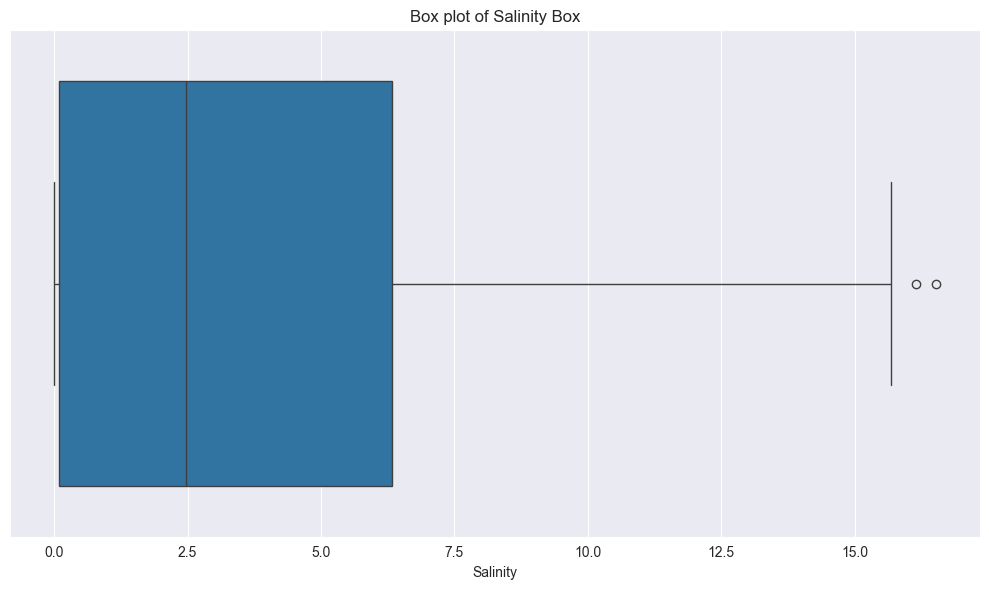

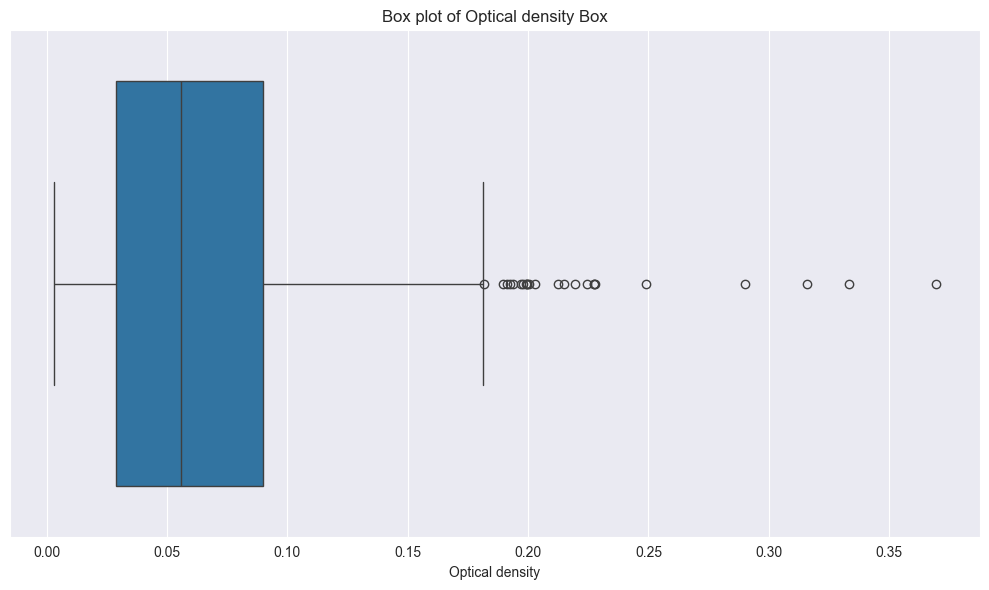

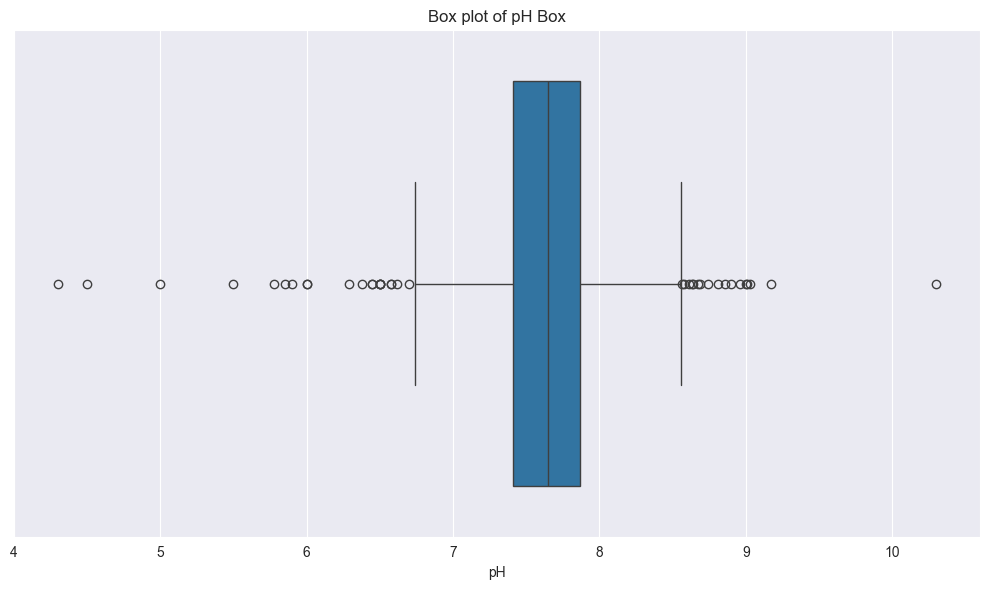

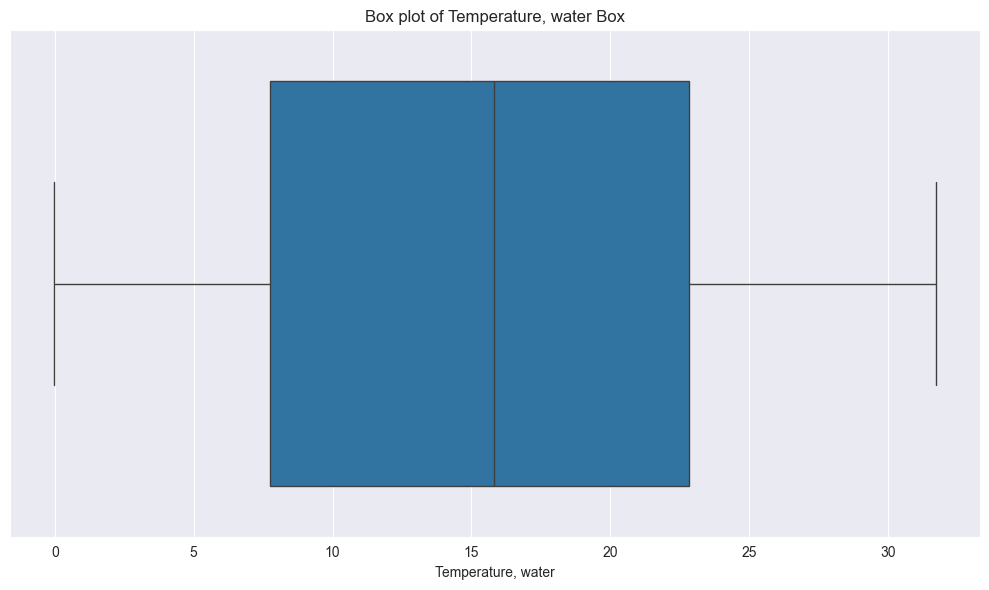

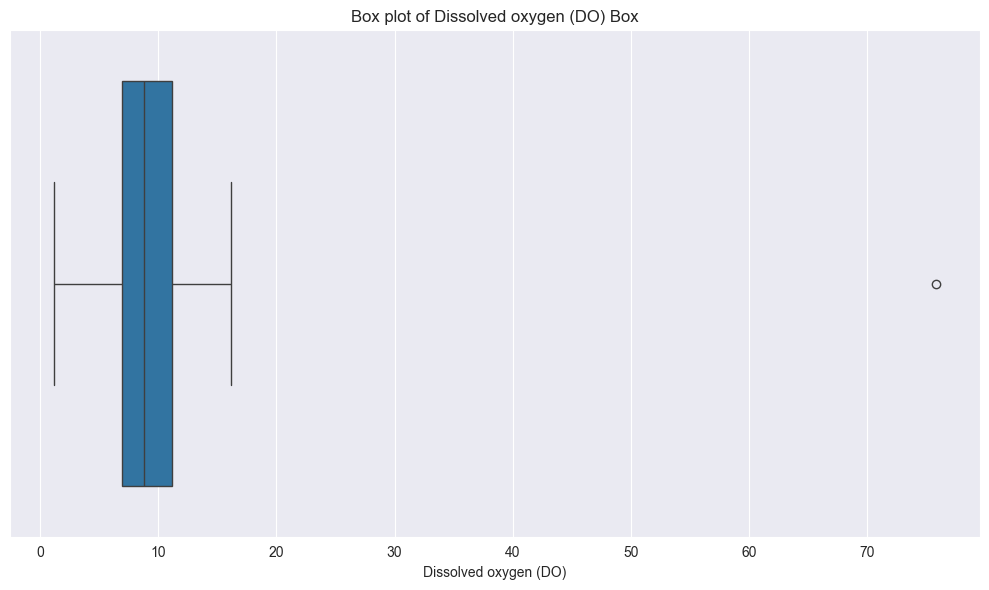

In [41]:
sns.set_style("darkgrid")

# Graph the specified columns
columns_to_graph = ['Salinity', 'Optical density', 'pH', 'Temperature, water', 'Dissolved oxygen (DO)']

# Create box plots for the specified columns
for column in columns_to_graph:
    if column in pivoted_wq_subset.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=pivoted_wq_subset[column])
        plt.title(f'Box plot of {column} Box')
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataframe.")


#### 4i. Checking for Seasonal Patterns in Water Quality Indicators

Kernel Density Plots (KDEs)

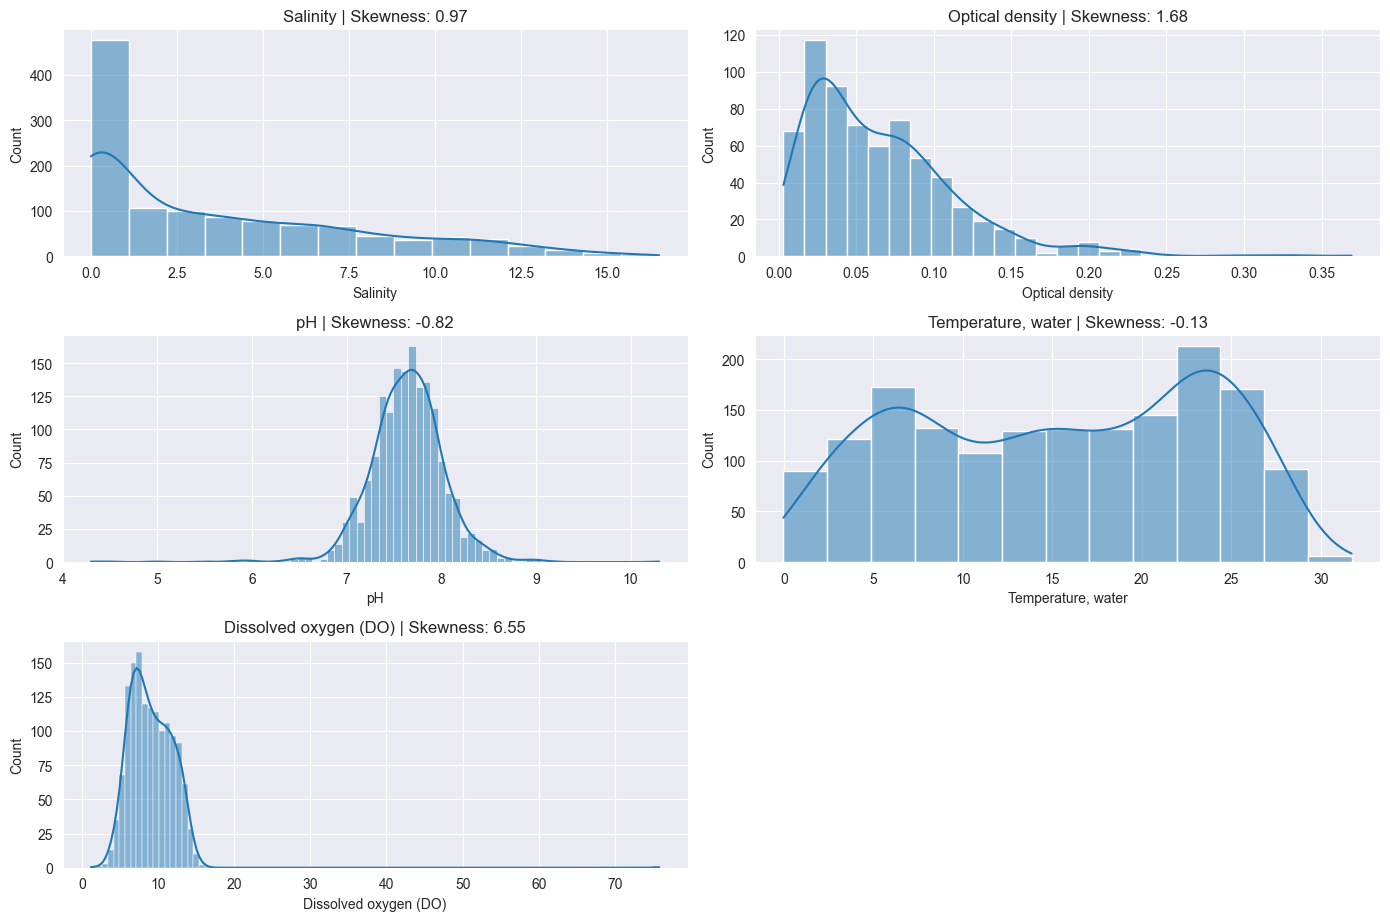

In [42]:
sns.set_style("darkgrid")

# Graph the specified columns
columns_to_graph = ['Salinity', 'Optical density', 'pH', 'Temperature, water', 'Dissolved oxygen (DO)']

plt.figure(figsize=(14, len(columns_to_graph) * 3))
for idx, feature in enumerate(columns_to_graph, 1):
    plt.subplot(len(columns_to_graph), 2, idx)
    sns.histplot(pivoted_wq_subset[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(pivoted_wq_subset[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

Right-skewed: Salinity, Optical Density, and Dissolved Oxygen (DO).

Left-skewed: pH.

Bimodal distribution: Water temperature, suggesting seasonal patterns.

Check for Cyclical Trends Over Time

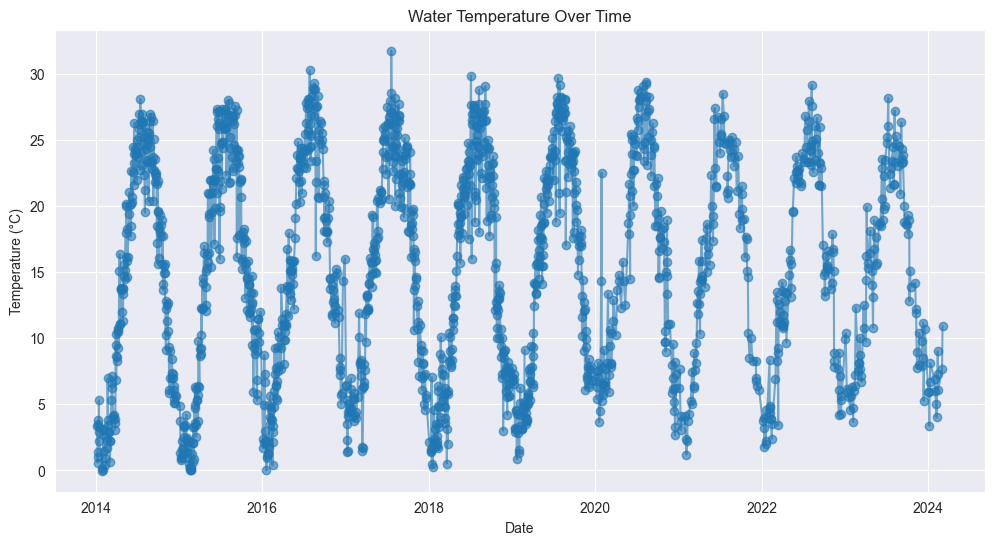

In [43]:
# Convert date column to datetime
pivoted_wq_subset['ActivityStartDate'] = pd.to_datetime(pivoted_wq_subset['ActivityStartDate'])

# Sort data by time
pivoted_wq_subset = pivoted_wq_subset.sort_values(by='ActivityStartDate')

# Plot water temperature over time
plt.figure(figsize=(12, 6))
plt.plot(pivoted_wq_subset['ActivityStartDate'], pivoted_wq_subset['Temperature, water'], marker='o', linestyle='-', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Water Temperature Over Time')
plt.show()


Time Series Analysis

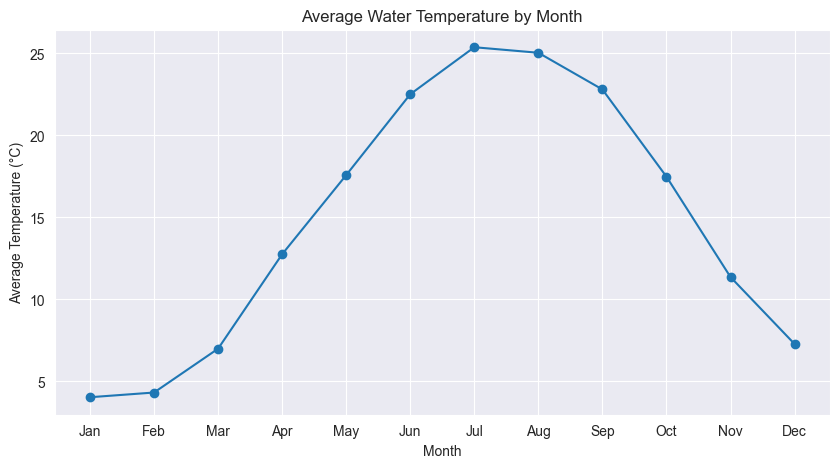

In [44]:
# Convert date column to datetime
pivoted_wq_subset['ActivityStartDate'] = pd.to_datetime(pivoted_wq_subset['ActivityStartDate'])

# Extract month from date
pivoted_wq_subset['Month'] = pivoted_wq_subset['ActivityStartDate'].dt.month

# Compute mean water temperature for each month
monthly_avg_temp = pivoted_wq_subset.groupby('Month')['Temperature, water'].mean()

# Plot monthly trends
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', linestyle='-')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Water Temperature by Month')
plt.show()


Water temperature is higher in summer (June-Aug) and lower in winter (Dec-Feb).

Seasonal decomposition confirms this strong annual cycle.

/var/folders/ls/mz0w58s926z1f4jr9yc936tc0000gn/T/ipykernel_44181/674842864.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pivoted_wq_subset = pivoted_wq_subset.resample('M').mean()  # Resample to monthly frequency


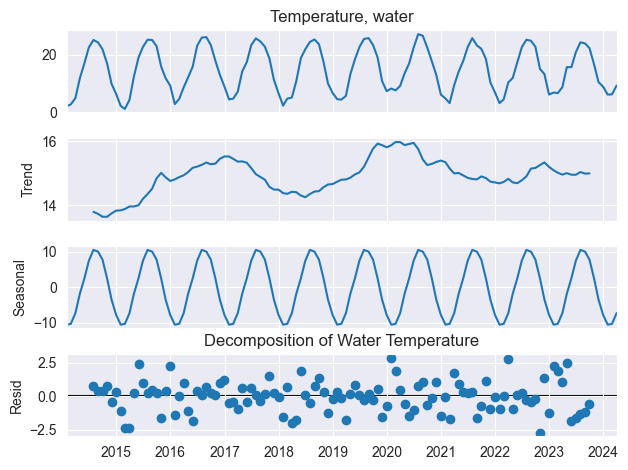

In [45]:
# Convert date column to datetime
pivoted_wq_subset['ActivityStartDate'] = pd.to_datetime(pivoted_wq_subset['ActivityStartDate'])

# Extract month from date
pivoted_wq_subset['Month'] = pivoted_wq_subset['ActivityStartDate'].dt.month

# Ensure time series is complete (fill missing dates if needed)
pivoted_wq_subset.set_index('ActivityStartDate', inplace=True)
pivoted_wq_subset = pivoted_wq_subset.resample('M').mean()  # Resample to monthly frequency

# Decompose time series
decomposition = seasonal_decompose(pivoted_wq_subset['Temperature, water'], model='additive', period=12)

# Plot decomposition
decomposition.plot()
plt.title('Decomposition of Water Temperature')
plt.show()


#### 4j. Identify Correlation among Water Quality Subset Indicators

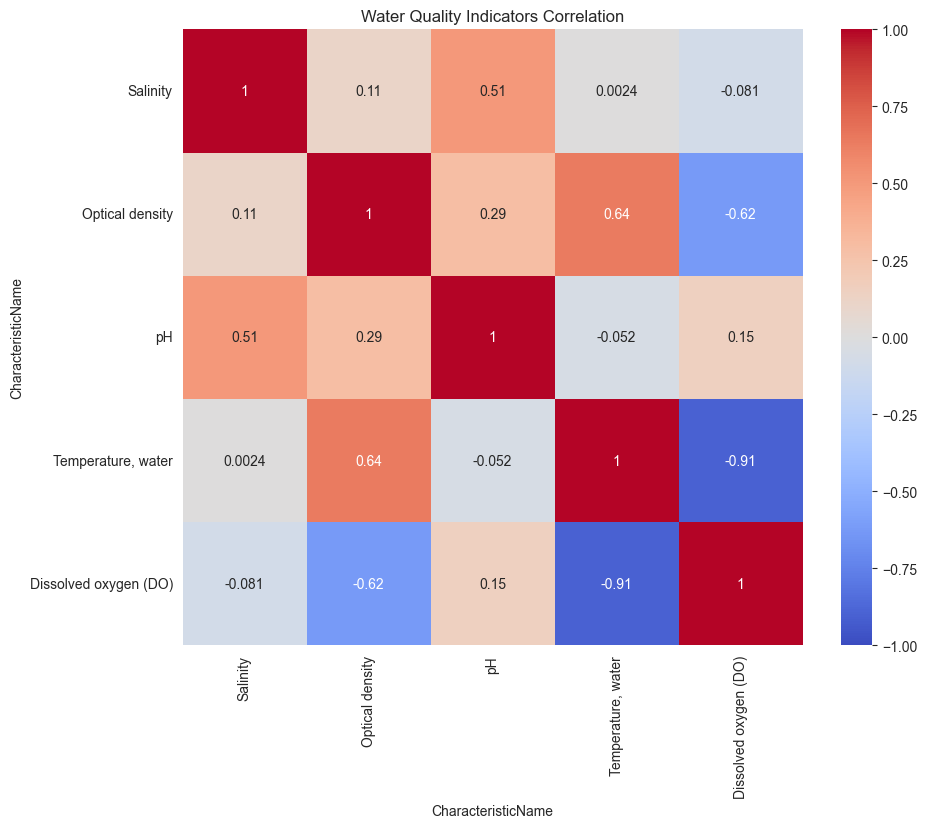

In [46]:
# Graph the specified columns
columns_to_graph = ['Salinity', 'Optical density', 'pH', 'Temperature, water', 'Dissolved oxygen (DO)']

# Calculate the correlation matrix
correlation_matrix = pivoted_wq_subset[columns_to_graph].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Water Quality Indicators Correlation')
plt.show()

Temperature vs. Dissolved Oxygen: Strong negative correlation (-0.91)

- Warmer water holds less dissolved oxygen due to reduced gas solubility.

Optical Density vs. Dissolved Oxygen: Negative correlation (-0.62)

- High turbidity (more particles in water) may lead to oxygen depletion.

Temperature vs. Optical Density: Moderate positive correlation (0.64)

- Higher temperatures may contribute to algal blooms, increasing turbidity.

Salinity vs. pH: Moderate positive correlation (0.51)

- Higher salinity waters (e.g., coastal areas) tend to be more alkaline (higher pH).

Little to No Correlation:

- Salinity vs. Temperature (0.0024): No significant relationship.

- pH vs. Temperature (-0.052): No direct temperature influence on pH.

## Summary

### Data Cleaning

#### General (All Tables)
- To improve readability and consistency, all column names should be converted to lowercase, with words separated by underscores (_).

- The column Unnamed: 0 will be renamed to id.

#### Organizations
- The following duplicate columns are irrelevant to this analysis and will be removed: 
    - OrganizationAddress.AddressTypeName_1
    - OrganizationAddress.LocalityName_1
    - OrganizationAddress.StateCode_1
    - OrganizationAddress.CountryCode_1.

- Columns in positions 15 through 31 are currently of type float64 but should be object (string). However, since these columns will be dropped, this conversion is unnecessary.

- The following columns will be retained:
    - id (formerly "Unnamed: 0)
    - OrganizationIdentifier
    - OrganizationFormalName
    - OrganizationDescriptionText
    - OrganizationType
    - TribalCode
    - ProviderName

#### Projects

- All columns will be retained.

#### Sites

- All columns will be retained.

#### Physical Chemistry Results

- All columns will be retained.



### Data Quality Requirements

|Dataset|Rows|Columns|Column Name and Counts|Duplicate Rows?|Unexpected Duplicates in Column?|
|----------|----|-------|-------|--------|------|
|Organization|18|7|id: 18, <br> organization_identifier: 18, <br> organization_formal_name: 18, <br> organization_description_text: 13, <br> organization_type: 16, <br> tribal_code: 1, <br> provider_name: 18|no|no|
|Projects|326 |11|id: 326, <br> organization_identifier: 326, <br> organization_formal_name: 326, <br> project_identifier: 326, <br> project_name: 326, <br> project_description_text: 326, <br> sampling_design_type_code: 1, <br> qapp_approved_indicator: 61, <br> qapp_approval_agency_name: 4, <br> project_file_url: 1, <br> project_monitoring_location_weighting_url: 0|no|no|
|Sites|761|38|id: 761, <br> organization_identifier: 761, <br> organization_formal_name: 761, <br> monitoring_location_identifier: 761, <br> monitoring_location_name: 761, <br> monitoring_location_type_name: 761, <br> monitoring_location_description_text: 431, <br> huc_eight_digit_code: 761, <br> drainage_area_measure_measure_value: 24, <br> drainage_area_measure_measure_unit_code: 24, <br>contributing_drainage_area_measure_measure_value: 0, <br> contributing_drainage_area_measure_measure_unit_code: 0, <br> latitude_measure: 761, <br> longitude_measure: 761, <br> source_map_scale_numeric: 85, <br> horizontal_accuracy_measure_measure_value: 103, <br> horizontal_accuracy_measure_measure_unit_code: 103, <br> horizontal_collection_method_name: 761, <br> horizontal_coordinate_reference_system_datum_name: 761, <br> vertical_measure_measure_value: 101, <br> vertical_measure_measure_unit_code: 101, <br> vertical_accuracy_measure_measure_value: 83, <br> vertical_accuracy_measure_measure_unit_code: 83, <br> vertical_collection_method_name: 101, <br> vertical_coordinate_reference_system_datum_name: 101, <br> country_code: 761, <br> state_code: 761, <br> county_code: 761, <br> aquifer_name: 47, <br> local_aqfr_name: 0, <br> formation_type_text: 49, <br> aquifer_type_name: 37, <br> construction_date_text: 47, <br> well_depth_measure_measure_value: 49, <br> well_depth_measure_measure_unit_code: 49, <br> well_hole_depth_measure_measure_value: 48, <br> well_hole_depth_measure_measure_unit_code: 48, <br> provider_name: 761|no|no|
|Physical<br> Chemistry<br> Results|404717|86|id: 404717, <br> OrganizationIdentifier: 404717, <br> OrganizationFormalName: 404717, <br> ActivityIdentifier: 404717, <br> ActivityTypeCode: 404717, <br> ActivityMediaName: 404717, <br> ActivityMediaSubdivisionName: 23673, <br> ActivityStartDate: 404717, <br> ActivityStartTime.Time: 363314, <br> ActivityStartTime.TimeZoneCode: 363314, <br> ActivityEndDate: 68311, <br> ActivityEndTime.Time: 68197, <br> ActivityEndTime.TimeZoneCode: 99561, <br> ActivityRelativeDepthName: 143114, <br> ActivityDepthHeightMeasure.MeasureValue: 131177, <br> ActivityDepthHeightMeasure.MeasureUnitCode: 153337, <br> ActivityDepthAltitudeReferencePointText: 76280, <br> ActivityTopDepthHeightMeasure.MeasureValue: 80101, <br> ActivityTopDepthHeightMeasure.MeasureUnitCode: 102261, <br> ActivityBottomDepthHeightMeasure.MeasureValue: 115211, <br> ActivityBottomDepthHeightMeasure.MeasureUnitCode: 151495, <br> ProjectIdentifier: 382958, <br> ProjectName: 382474, <br> ActivityConductingOrganizationText: 240380, <br> MonitoringLocationIdentifier: 404717, <br> MonitoringLocationName: 382474, <br> ActivityCommentText: 129235, <br> SampleAquifer: 15, <br> HydrologicCondition: 22243, <br> HydrologicEvent: 22243, <br> ActivityLocation.LatitudeMeasure: 382474, <br> ActivityLocation.LongitudeMeasure: 382474, <br> SampleCollectionMethod.MethodIdentifier: 359859, <br> SampleCollectionMethod.MethodIdentifierContext: 359859, <br> SampleCollectionMethod.MethodName: 359859, <br> SampleCollectionMethod.MethodDescriptionText: 136231, <br> SampleCollectionEquipmentName: 359853, <br> ResultIdentifier: 404717, <br> ResultDetectionConditionText: 3958, <br> MethodSpeciationName: 51981, <br> CharacteristicName: 404717, <br> ResultSampleFractionText: 67757, <br> ResultMeasureValue: 401062, <br> ResultMeasure.MeasureUnitCode: 322889, <br> MeasureQualifierCode: 724, <br> ResultStatusIdentifier: 404717, <br> StatisticalBaseCode: 3200, <br> ResultValueTypeName: 404462, <br> ResultWeightBasisText: 327, <br> ResultTimeBasisText: 1046, <br> ResultTemperatureBasisText: 13898, <br> ResultParticleSizeBasisText: 43265, <br> DataQuality.PrecisionValue: 0, <br> DataQuality.BiasValue: 0, <br> DataQuality.ConfidenceIntervalValue: 48006, <br> DataQuality.UpperConfidenceLimitValue: 41750, <br> DataQuality.LowerConfidenceLimitValue: 41750, <br> ResultCommentText: 23407, <br> USGSPCode: 22243, <br> ResultDepthHeightMeasure.MeasureValue: 160882, <br> ResultDepthHeightMeasure.MeasureUnitCode: 160882, <br> ResultDepthAltitudeReferencePointText: 48006, <br> SubjectTaxonomicName: 0, <br> SampleTissueAnatomyName: 0, <br> BinaryObjectFileName: 12, <br> BinaryObjectFileTypeCode: 12, <br> ResultFileUrl: 12, <br> ResultAnalyticalMethod.MethodIdentifier: 291843, <br> ResultAnalyticalMethod.MethodIdentifierContext: 295178, <br> ResultAnalyticalMethod.MethodName: 295169, <br> ResultAnalyticalMethod.MethodUrl: 0, <br> ResultAnalyticalMethod.MethodDescriptionText: 89183, <br> LaboratoryName: 98822, <br> AnalysisStartDate: 9588, <br> ResultLaboratoryCommentText: 488, <br> ResultDetectionQuantitationLimitUrl: 87838, <br> DetectionQuantitationLimitTypeName: 97274, <br> DetectionQuantitationLimitMeasure.MeasureValue: 96748, <br> DetectionQuantitationLimitMeasure.MeasureUnitCode: 73567, <br> LabSamplePreparationUrl: 0, <br> LastUpdated: 382474, <br> ProviderName: 404717, <br> ActivityStartTime.TimeZoneCode_offset: 363080, <br> ActivityStartDateTime: 363080, <br> ActivityEndTime.TimeZoneCode_offset: 99561, <br> ActivityEndDateTime: 68197|no|no|

|Dataset|String Data Type|Float Data Type|Integer Data Type|
|-------|------|-----|-------|
|Organization|organization_identifier, <br> organization_formal_name, <br> organization_description_text, <br> organization_type, <br> tribal_code, <br> provider_name|n/a|id|
|Projects|organization_identifier, <br> organization_formal_name, <br> project_identifier, <br> project_name, <br> project_description_text, <br> sampling_design_type_code, <br> qapp_approved_indicator, <br> qapp_approval_agency_name, <br> project_file_url, <br> project_monitoring_location_weighting_url|n/a|id|
|Sites|organization_identifier, <br> organization_formal_name, <br> monitoring_location_identifier, <br> monitoring_location_name, <br> monitoring_location_type_name, <br> monitoring_location_description_text, <br> drainage_area_measure_measure_unit_code, <br> contributing_drainage_area_measure_measure_unit_code, <br> horizontal_accuracy_measure_measure_unit_code, <br> horizontal_collection_method_name, <br> horizontal_coordinate_reference_system_datum_name, <br> vertical_measure_measure_unit_code, <br> vertical_accuracy_measure_measure_unit_code, <br> vertical_collection_method_name, <br> vertical_coordinate_reference_system_datum_name, <br> country_code, <br> aquifer_name, <br> local_aqfr_name, <br> formation_type_text, <br> aquifer_type_name, <br> construction_date_text, <br> well_depth_measure_measure_unit_code, <br> well_hole_depth_measure_measure_unit_code, <br> provider_name |drainage_area_measure_measure_value, <br> contributing_drainage_area_measure_measure_value, <br> latitude_measure, <br> longitude_measure, <br> source_map_scale_numeric, <br> horizontal_accuracy_measure_measure_value, <br> vertical_measure_measure_value, <br> vertical_accuracy_measure_measure_value, <br> well_depth_measure_measure_value, <br> well_hole_depth_measure_measure_value|id, <br> huc_eight_digit_code, <br> state_code, <br> county_code|
|Physical Chemistry Results|organization_identifier, <br> organization_formal_name, <br> activity_identifier, <br> activity_type_code, <br> activity_media_name, <br> activity_media_subdivision_name, <br> activity_start_time_time_zone_code, <br> activity_end_time_time_zone_code, <br> activity_relative_depth_name, <br> activity_depth_height_measure_measure_unit_code, <br> activity_depth_altitude_reference_point_text, <br> activity_top_depth_height_measure_measure_unit_code, <br> activity_bottom_depth_height_measure_measure_unit_code, <br> project_identifier, <br> project_name, <br> activity_conducting_organization_text, <br> monitoring_location_identifier, <br> monitoring_location_name, <br> activity_comment_text, <br> sample_aquifer, <br> hydrologic_condition, <br> hydrologic_event, <br> sample_collection_method_method_identifier sample_collection_method_method_identifier_context, <br> sample_collection_method_method_name, <br> sample_collection_method_method_description_text, <br> sample_collection_equipment_name, <br> result_identifier, <br> result_detection_condition_text, <br> method_speciation_name, <br> characteristic_name, <br> result_sample_fraction_text, <br> result_measure_measure_unit_code, <br> measure_qualifier_code, <br> result_status_identifier, <br> statistical_base_code, <br> result_value_type_name, <br> result_weight_basis_text, <br> result_time_basis_text, <br> result_temperature_basis_text, <br> result_particle_size_basis_text, <br> data_quality_confidence_interval_value, <br> data_quality_upper_confidence_limit_value, <br> data_quality_lower_confidence_limit_value, <br> result_comment_text, <br> result_depth_height_measure_measure_unit_code, <br> result_depth_altitude_reference_point_text, <br> binary_object_file_name, <br> binary_object_file_type_code, <br> result_file_url, <br> result_analytical_method_method_identifier, <br> result_analytical_method_method_identifier_context, <br> result_analytical_method_method_name, <br> result_analytical_method_method_description_text, <br> laboratory_name, <br> result_laboratory_comment_text, <br> result_detection_quantitation_limit_url, <br> detection_quantitation_limit_type_name, <br> detection_quantitation_limit_measure_measure_unit_code, <br> last_updated, <br> provider_name|activity_depth_height_measure_measure_value, <br> activity_top_depth_height_measure_measure_value, <br> activity_bottom_depth_height_measure_measure_value, <br> result_measure_value, <br> detection_quantitation_limit_measure_measure_value, <br> activity_location_latitude_measure, <br> activity_location_longitude_measure, <br> result_depth_height_measure_measure_value|id, <br> u_s_g_s_p_code, <br> activity_start_time_time_zone_code_offset, <br> activity_end_time_time_zone_code_offset|


|Dataset|Date Data type|Time Data Type|Datetime Data Type|Boolean Data Type|
|-------|--------------|----|--------|-------|
|Organization|n/a|n/a|n/a|n/a|
|Projects|n/a|n/a|n/a|qapp_approved_indicator|
|Sites|n/a|n/a|n/a|n/a|
|Physical<br> Chemistry<br> Results|activity_start_date, <br> activity_end_date, <br> analysis_start_date|activity_start_time_time, <br> activity_end_time_time|last_updated, <br> activity_start_date_time, <br> activity_end_date_time|n/a|


|Common Column|Column in Organizations?|Column in Projects?|Column in Sites?|Column in Physical Chemistry Results?|
|:-------------|:-------------:|:--------:|:-----:|:--------------------------:|
|OrganizationFormalName|Yes|Yes|Yes|Yes|
|OrganizationIdentifier|Yes|Yes|Yes|Yes|
|ProviderName|Yes|No|Yes|Yes|
|ProjectIdentifier|No|Yes|No|Yes|
|ProjectName|No|Yes|No|Yes|
|MonitoringLocationName|No|No|Yes|Yes|
|MonitoringLocationIdentifier|No|No|Yes|Yes|

### Citation: 

Water Quality Portal. Washington (DC): National Water Quality Monitoring Council, United States Geological Survey (USGS), Environmental Protection Agency (EPA); 2021. https://doi.org/10.5066/P9QRKUVJ.